In [ ]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning

In [2]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

11490434/11490434 [==============================] - 2s 0us/step


Text(0.5, 1.0, '0')

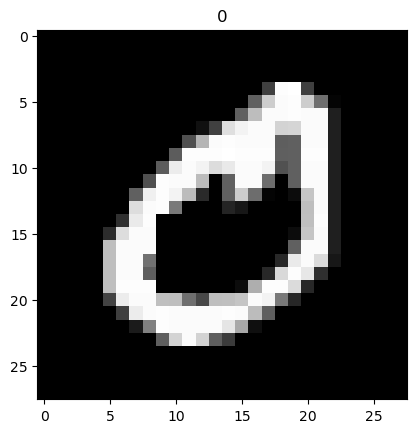

In [3]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [4]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [7]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [9]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [10]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4601 - accuracy: 0.8616 - val_loss: 0.1672 - val_accuracy: 0.9506
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2282 - accuracy: 0.9336 - val_loss: 0.1374 - val_accuracy: 0.9598
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1911 - accuracy: 0.9441 - val_loss: 0.1379 - val_accuracy: 0.9597
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1645 - accuracy: 0.9520 - val_loss: 0.1211 - val_accuracy: 0.9651
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1553 - accuracy: 0.9536 - val_loss: 0.1022 - val_accuracy: 0.9700
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1421 - accuracy: 0.9585 - val_loss: 0.0989 - val_accuracy: 0.9708
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1330 - accuracy: 0.9607 - val_loss: 0.0993 - val_accuracy:

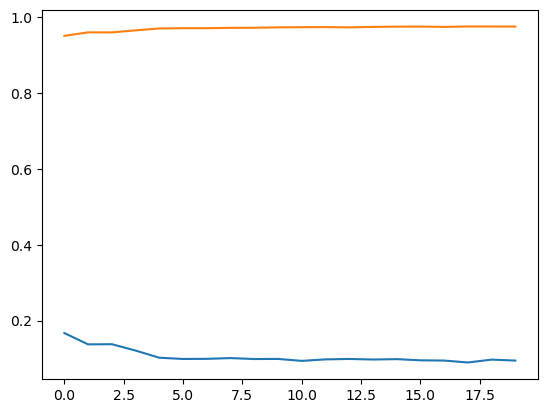

In [11]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [12]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 0s 819us/step


array([[2.0172779e-08, 1.7333521e-05, 3.0940417e-05, ..., 9.9944836e-01,
        1.0969889e-07, 4.6905447e-04],
       [6.9606472e-06, 4.9511342e-05, 9.9993163e-01, ..., 5.1868784e-07,
        1.9300825e-07, 1.3542618e-09],
       [8.4747820e-11, 9.9998885e-01, 1.2046578e-06, ..., 4.1380727e-06,
        5.6371623e-06, 2.7282119e-09],
       ...,
       [2.9763747e-11, 1.0398452e-12, 2.9041602e-09, ..., 9.7037258e-09,
        1.7573104e-10, 5.4869920e-06],
       [1.6818443e-20, 6.2391458e-18, 5.6359450e-21, ..., 3.1828792e-17,
        3.9991014e-12, 1.0966564e-15],
       [1.1046076e-13, 8.3183367e-21, 4.3454027e-18, ..., 6.7457548e-21,
        9.7216539e-17, 1.6720497e-21]], dtype=float32)

In [13]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 967,    0,    0,    1,    0,    3,    6,    1,    2,    0],
       [   0, 1122,    2,    2,    0,    3,    1,    1,    4,    0],
       [   5,    1,  998,    3,    5,    0,    3,    9,    7,    1],
       [   0,    0,    2,  985,    0,   13,    0,    5,    4,    1],
       [   1,    0,    0,    0,  966,    0,    6,    3,    1,    5],
       [   3,    1,    0,    2,    1,  877,    4,    0,    1,    3],
       [   3,    3,    1,    0,    4,    5,  941,    0,    1,    0],
       [   1,    3,   11,    1,    2,    0,    0, 1002,    2,    6],
       [   4,    2,    2,    9,    6,   11,    5,    4,  926,    5],
       [   1,    3,    0,    4,   24,    5,    1,    4,    1,  966]],
      dtype=int64)

In [14]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 15ms/step


[4]